In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
#from scipy.integrate import solve_ivp
#import perlin

plt.rcParams['agg.path.chunksize'] = 10000

rng = np.random.default_rng()

In [198]:
def easeinoutquad(t):
    
    if t<0:
        
        return 0
    
    elif t < 0.5:
        return 2*t*t
    
    elif t < 1:
        
        return 1 - (2-2*t)*(2-2*t)

def easequadrange(t,tmin,tmax):
    
    return tmin + (tmax-tmin)*easeinoutquad((t-tmin)/(tmax-tmin))


In [2]:
# Constants
pi = np.pi
twopi = 2*np.pi
sqrt2 = np.sqrt(2)
sqrt3 = np.sqrt(3)
degree = pi/180

# Colors

winter = ['#0D1B2A','#1B263B','#415A77','#778DA9','#E0E1DD']
summer = ["#0081af","#00abe7","#56351E","#ead2ac","#eaba6b"]
autumn = ["#f0a202","#f18805","#d95d39","#202c59","#581f18"]
spring = ["#FAC8CD","#66a182","#233329","#FFB30F","#c0d461"]
pikachu = ["#000000","#eabb1f","#C04A35","#846339","#daaf44","#eabb1f","#846339","#daaf44"]
paradise_pink = ["#053225","#e34a6f","#f7b2bd","#b2a198","#60a561"]
pastel  = ["#d6f6dd","#dac4f7","#f4989c","#ebd2b4","#acecf7"]
pastel2 = ["#dd6e42","#4f6d7a","#b37ba4","#d99ac5","#acecf7"]
bright_winter = ["#2b4141","#0eb1d2","#34e4ea","#8ab9b5","#c8c2ae"]
flags = ["#d05353","#083d77","#ebebd3","#f4d35e","#0ead69"]

In [3]:
def project_screen(point,x_screen,screen_size,fov,view_angle=0,in_fov=False):
    
    slope = np.tan(0.5*fov)
    focal_distance = 0.5*screen_size/slope
    
    
    if view_angle != 0:
        
        rot_mat = np.array([[np.cos(-view_angle),0,np.sin(-view_angle)],
                            [0,1,0],
                            [-np.sin(-view_angle),0,np.cos(-view_angle)]])
        point = np.dot(rot_mat,point)
    
    sq_dist_from_axis = point[1]*point[1] + point[2]*point[2]
    max_sq_dist = slope*slope*(point[0]-x_screen+focal_distance)*(point[0]-x_screen+focal_distance)
    
    if point[0]>x_screen and sq_dist_from_axis <= max_sq_dist:
        
        scale = focal_distance/((point[0]-x_screen)+focal_distance)
        if in_fov:
            return scale*point[1:],True,point[0]-x_screen
        else:
            return scale*point[1:]
    else:
        if in_fov:
            return _,False,point[0]-x_screen

In [13]:
def hopf_fiber(theta,phi,xi):
    
    if theta == 0:
        return np.array([np.cos(xi),np.sin(xi),0])
    
    else:
        
        beta = np.sqrt(1-np.cos(theta))
        betainv = 1/beta
        
        x = betainv*np.sin(theta)*np.cos(phi+xi)
        y = betainv*np.sin(theta)*np.sin(phi+xi)
        z = beta*np.sin(xi)
        
        scale = (1/(sqrt2 - beta*np.cos(xi)))
        #print('scale:',scale)
        return scale*np.array([x,y,z])

def new_hopf_fiber(theta,phi,xi):


    x = np.cos(0.5*theta)*np.cos(phi+xi)
    y = np.cos(0.5*theta)*np.sin(phi+xi)
    z = np.sin(0.5*theta)*np.cos(xi)
    h = np.sin(0.5*theta)*np.sin(xi)

    return (1/(1-h))*np.array([x,y,z])

In [22]:
def projected_orbit(theta,phi,Xis,x_screen,screen_size,fov,view_angle):
    
    
    segments = []
    
    points = []
    
    all_values = [project_screen(new_hopf_fiber(theta,phi,xi),x_screen,screen_size,fov,view_angle,in_fov=True) for xi in Xis]
    
    in_fovs = [value[1] for value in all_values]
    points = [value[0] for value in all_values]
    distances = [value[2] for value in all_values]
    
    index = 0
    
    #print(in_fovs,'\n')
    
    while index < len(in_fovs):
        #print(index)
        #print(in_fovs[index])
        #print(segments,'\n')
        ## go to first element in FOV
        
        while not in_fovs[index] and index<len(in_fovs):
            index +=1
            if(index >= len(in_fovs)):
                break
        if(index >= len(in_fovs)):
            break
        
        segment = []
        
        while in_fovs[index] and index<len(in_fovs):
            segment.append([points[index],distances[index]])
            index +=1
            if(index >= len(in_fovs)):
                break
            #print(index)
            #print(segment,'\n')
        
        if len(segment)>0:
            segments.append(segment)

    
    return segments

In [7]:
n_xis = 100
Xis = np.linspace(0,twopi,n_xis)

theta = 0.9*pi
phi = 0


fov = 90*degree
screen_width = 2
screen_height = 2
screen_size = np.sqrt(screen_width**2 + screen_height**2)
x_screen = -5
view_angle = 20*degree

projected_orbit(theta,phi,Xis,x_screen,screen_size,fov,view_angle)

[[[array([0.       , 0.3348486]), 16.93992682877829],
  [array([0.06465966, 0.73160686]), 13.760660800302848],
  [array([0.12020302, 1.0353076 ]), 10.087105890398663],
  [array([0.15287756, 1.17831219]), 7.666171370930703],
  [array([0.16367201, 1.18681265]), 6.306590523837043],
  [array([0.16071293, 1.12086977]), 5.555821259752758],
  [array([0.15123083, 1.02645064]), 5.131460395948482],
  [array([0.13952298, 0.92803885]), 4.884848505738518],
  [array([0.12768856, 0.8360669 ]), 4.738617549495465],
  [array([0.11661023, 0.75390608]), 4.651285156976169],
  [array([0.10658035, 0.68184857]), 4.599720219369852],
  [array([0.09762777, 0.61901759]), 4.5705155336176375],
  [array([0.08967479, 0.56420566]), 4.55562236184148],
  [array([0.08260898, 0.51621479]), 4.550057764286074],
  [array([0.07631441, 0.47397721]), 4.550653895853968],
  [array([0.07068423, 0.43658376]), 4.555350831555012],
  [array([0.06562462, 0.40327625]), 4.562783409646682],
  [array([0.06105518, 0.37342783]), 4.5720326225

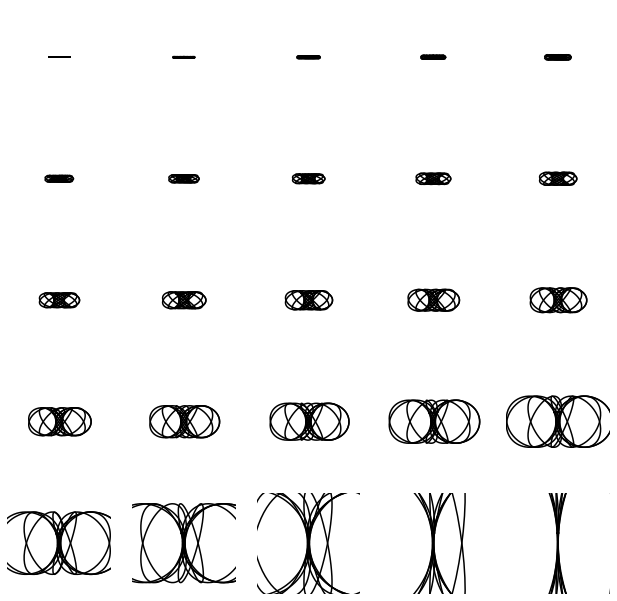

In [14]:
# Orthogonal projection of some Hopf fibers

sqrt_n_thetas = 5 
n_phis = 10
n_xis = 500

n_thetas = sqrt_n_thetas*sqrt_n_thetas

Thetas = np.linspace(0,pi,n_thetas,endpoint=False)
Phis = np.linspace(0,twopi,n_phis)
Xis = np.linspace(0,twopi,n_xis)

fig, axs = plt.subplots(sqrt_n_thetas,sqrt_n_thetas,figsize=(10.8,10.8),sharex=True)

for i in range(sqrt_n_thetas):
    for j in range(sqrt_n_thetas):
        
        idx = sqrt_n_thetas*i + j
        
        theta = Thetas[idx]
        
        for phi in Phis:
            
            points = np.array([new_hopf_fiber(theta,phi,xi)[1:] for xi in Xis])
            
            axs[i][j].plot(points[:,0],points[:,1],'k')
            axs[i][j].set_xlim(-5,5)
            axs[i][j].set_ylim(-5,5)
            axs[i][j].axis('off')
plt.show()

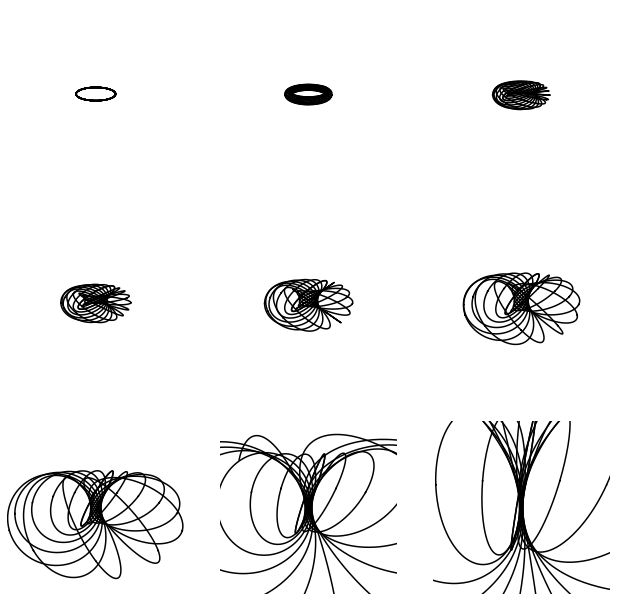

In [20]:
# Perspective projection of some Hopf fibers

sqrt_n_thetas = 3
n_phis = 15
n_xis = 700


fov = 90*degree
screen_width = 2
screen_height = 2
screen_size = np.sqrt(screen_width**2 + screen_height**2)
x_screen = -5
view_angle = 20*degree

n_thetas = sqrt_n_thetas*sqrt_n_thetas
Thetas = np.linspace(0,pi,n_thetas,endpoint=False)
Phis = np.linspace(0,twopi,n_phis)
Xis = np.linspace(0,twopi,n_xis)

fig, axs = plt.subplots(sqrt_n_thetas,sqrt_n_thetas,figsize=(10.8,10.8),sharex=True)
fig.patch.set_alpha(1)

for i in range(sqrt_n_thetas):
    for j in range(sqrt_n_thetas):
        
        idx = sqrt_n_thetas*i + j
        
        theta = Thetas[idx]
        
        for phi in Phis:
            
            segments = projected_orbit(theta,phi,Xis,x_screen,screen_size,fov,view_angle)
            #print(points.shape)

            
            for segment in segments:
                points = [value[0] for value in segment]
                distances = [value[1] for value in segment]
                points = np.array(points)
                axs[i][j].plot(points[:,0],points[:,1],'k')
            
            axs[i][j].set_xlim(-screen_width/2,screen_width/2)
            axs[i][j].set_ylim(-screen_height/2,screen_height/2)
            #axs[i][j].axis('equal')
            axs[i][j].axis('off')
plt.savefig('hopf_bundle_grid_perspective.png',dpi=100,bbox_inches='tight',pad_inches=0.0)
plt.show()

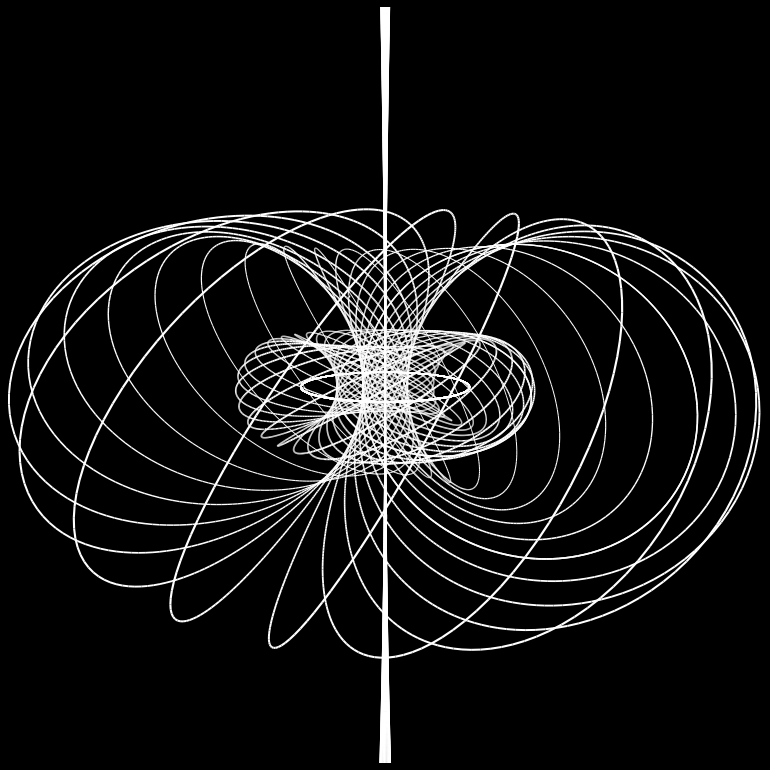

In [26]:
# Perspective projection of some Hopf fibers

n_thetas = 4
n_phis = 25
n_xis = 400


fov = 90*degree
screen_width = 2
screen_height = 2
screen_size = np.sqrt(screen_width**2 + screen_height**2)
x_screen = -5
view_angle = 10*degree

Thetas = np.linspace(0,pi- 1e-2,n_thetas)
Phis = np.linspace(0,twopi,n_phis)
Xis = np.linspace(0,twopi,n_xis)

fig, ax = plt.subplots(figsize=(10.8,10.8))

for theta in Thetas:
    for phi in Phis:

        segments = projected_orbit(theta,phi,Xis,x_screen,screen_size,fov,view_angle)
        #print(points.shape)

        for segment in segments:
            points = np.array([value[0] for value in segment]).reshape(-1,1,2)
            distances = np.array([value[1] for value in segment])
            
            line_segments = np.concatenate([points[:-1], points[1:]], axis=1)
            #print(line_segments)
            norm = plt.Normalize(distances.min(),distances.max()) 
            lc = mpl.collections.LineCollection(line_segments,colors='w',antialiaseds=True)
            #lc.set_array(distances)
            lc.set_linewidth(3*(0.5 - (1/pi)*np.arctan((distances-5)/4)))
            ax.add_collection(lc)
            #ax.plot(points[:,0],points[:,1],'w',lw=2)

ax.set_xlim(-screen_width/2,screen_width/2)
ax.set_ylim(-screen_height/2,screen_height/2)
#axs[i][j].axis('equal')
ax.axis('off')
fig.set_facecolor('k')
fig.tight_layout()
fig.savefig('hopf-fibration-%0.2f.png'%(theta/degree),dpi=200,bbox_inches='tight',pad_inches=0)
plt.show()

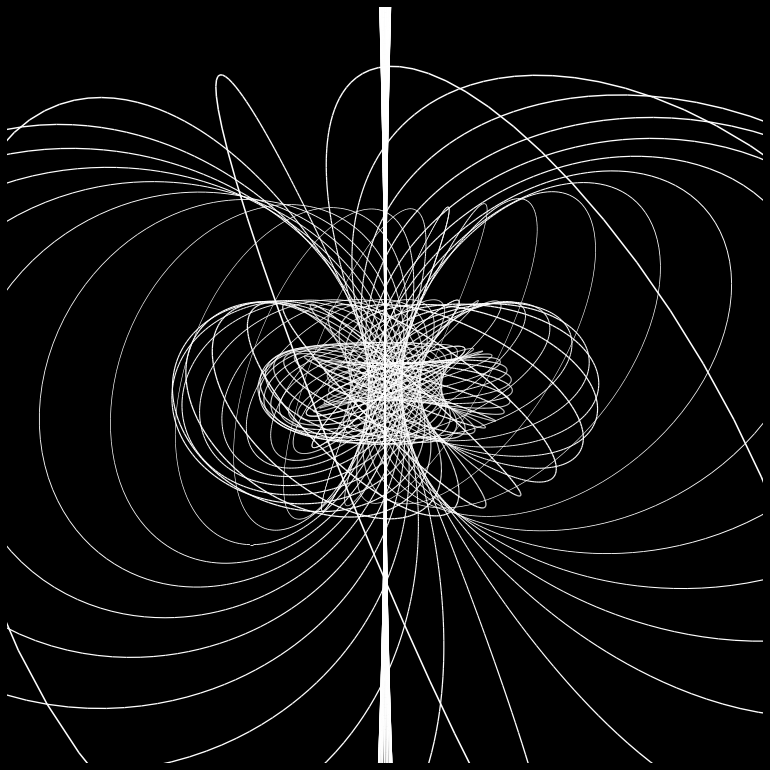

In [205]:
# Perspective projection of some Hopf fibers

n_init_thetas = 5
n_phis = 25
n_xis = 400


fov = 90*degree
screen_width = 2
screen_height = 2
screen_size = np.sqrt(screen_width**2 + screen_height**2)
x_screen = -5
view_angle = 10*degree

n_cycles = 2
n_phi_cycles = 5
secs_per_cycle = 8
fps = 60

n_frames = fps*n_cycles*secs_per_cycle


Thetas = np.linspace(0,twopi*n_cycles,n_frames,endpoint=False)
#Thetas = np.array([easequadrange(theta%twopi,0,pi) if theta%twopi < pi\
#                   else easequadrange(pi - theta%twopi,0,pi) for theta in Thetas])

Phioffsets = np.linspace(0,twopi*n_phi_cycles,n_frames,endpoint=False)
Phis = np.linspace(0,twopi,n_phis)
Xis = np.linspace(0,twopi,n_xis)
Init_Thetas = np.linspace(0,pi,n_init_thetas)
frequencies = (1/n_phi_cycles)*np.arange(1,n_phi_cycles+1)


fig, ax = plt.subplots(figsize=(10.8,10.8))
fig.set_facecolor('k')


for frame, (theta0, phioffset) in enumerate(zip(Thetas,Phioffsets)):
    ax.cla()
    
    for theta,freq in zip((Init_Thetas+theta0)%pi,frequencies):
        
        for phi in Phis+freq*phioffset:
            
            segments = projected_orbit(theta,phi,Xis,x_screen,screen_size,fov,view_angle)
            #print(points.shape)

            for segment in segments:
                points = np.array([value[0] for value in segment]).reshape(-1,1,2)
                distances = np.array([value[1] for value in segment])

                line_segments = np.concatenate([points[:-1], points[1:]], axis=1)
                #print(line_segments)
                norm = plt.Normalize(distances.min(),distances.max()) 
                lc = mpl.collections.LineCollection(line_segments,colors='w',antialiaseds=True)
                #lc.set_array(distances)
                lc.set_linewidth(2*(0.5 - (1/pi)*np.arctan((distances-5)/4)))
                ax.add_collection(lc)
                #ax.plot(points[:,0],points[:,1],'w',lw=2)

    ax.set_xlim(-screen_width/2,screen_width/2)
    ax.set_ylim(-screen_height/2,screen_height/2)
    #axs[i][j].axis('equal')
    ax.axis('off')
    fig.tight_layout()
    fig.savefig('animation/hopf-fibration-%04d.png'%(frame),dpi=200,bbox_inches='tight',pad_inches=0)
    print('Frame',frame+1,'of',n_frames,end='\r')
plt.show()

In [127]:
lines